<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/ML-LAB/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/lung_cancer_dataset.csv")
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [6]:
df.columns


Index(['patient_id', 'age', 'gender', 'pack_years', 'radon_exposure',
       'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis',
       'alcohol_consumption', 'family_history', 'lung_cancer'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])

df["radon_exposure"]=le.fit_transform(df["radon_exposure"])
df["alcohol_consumption"]=le.fit_transform(df["alcohol_consumption"])
df["copd_diagnosis"]=le.fit_transform(df["copd_diagnosis"])
df["family_history"]=le.fit_transform(df["family_history"])
df["asbestos_exposure"]=le.fit_transform(df["asbestos_exposure"])
df["secondhand_smoke_exposure"]=le.fit_transform(df["secondhand_smoke_exposure"])
df["lung_cancer"]=le.fit_transform(df["lung_cancer"])
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,1,66.025244,0,0,0,1,1,0,0
1,100001,32,0,12.780800,0,0,1,1,1,1,1
2,100002,89,0,0.408278,2,1,1,1,2,0,1
3,100003,78,0,44.065232,1,0,1,0,1,0,1
4,100004,38,0,44.432440,2,1,0,1,2,1,1


In [8]:
import numpy as np
numericals=df.select_dtypes(include=[np.number]).columns
print(numericals)
df[numericals]=df[numericals].fillna(df[numericals].mean())

Index(['patient_id', 'age', 'gender', 'pack_years', 'radon_exposure',
       'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis',
       'alcohol_consumption', 'family_history', 'lung_cancer'],
      dtype='object')


In [6]:
[col for col in df.columns if df[col].isnull().sum() > 0]


[]

Accuracy: 0.7291333333333333
Recall: 0.9259044302573032

Confusion Matrix [[1365 3297]
 [ 766 9572]]


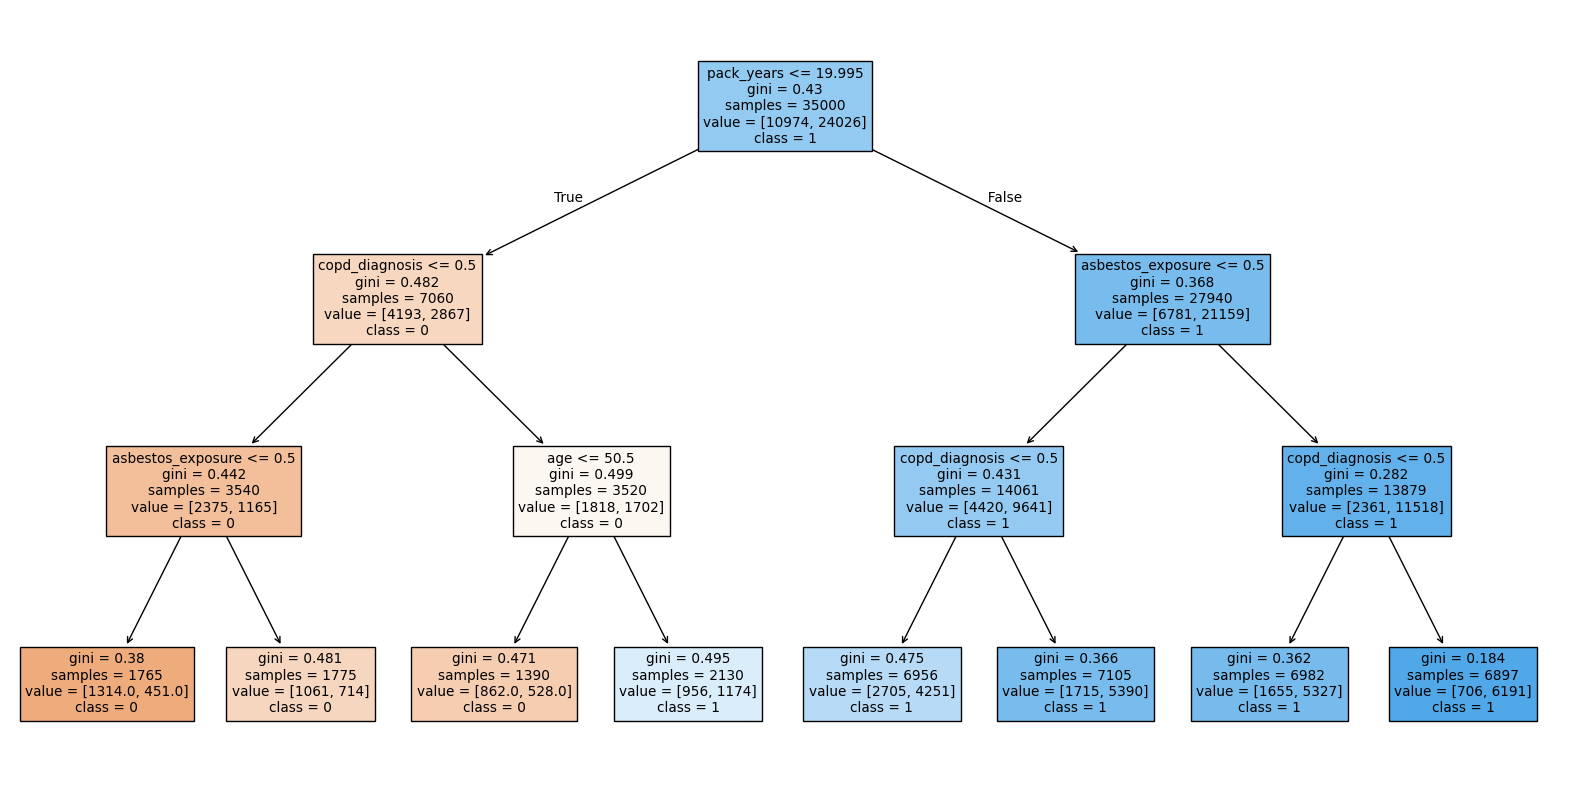

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score
from sklearn import tree
import matplotlib.pyplot as plt
X = df.drop("lung_cancer", axis=1)
y = df["lung_cancer"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,feature_names=X.columns,class_names=["0","1"])
plt.show()




if entropy
Accuracy: 0.7291333333333333
Recall: 0.9259044302573032

Confusion Matrix [[1365 3297]
 [ 766 9572]]


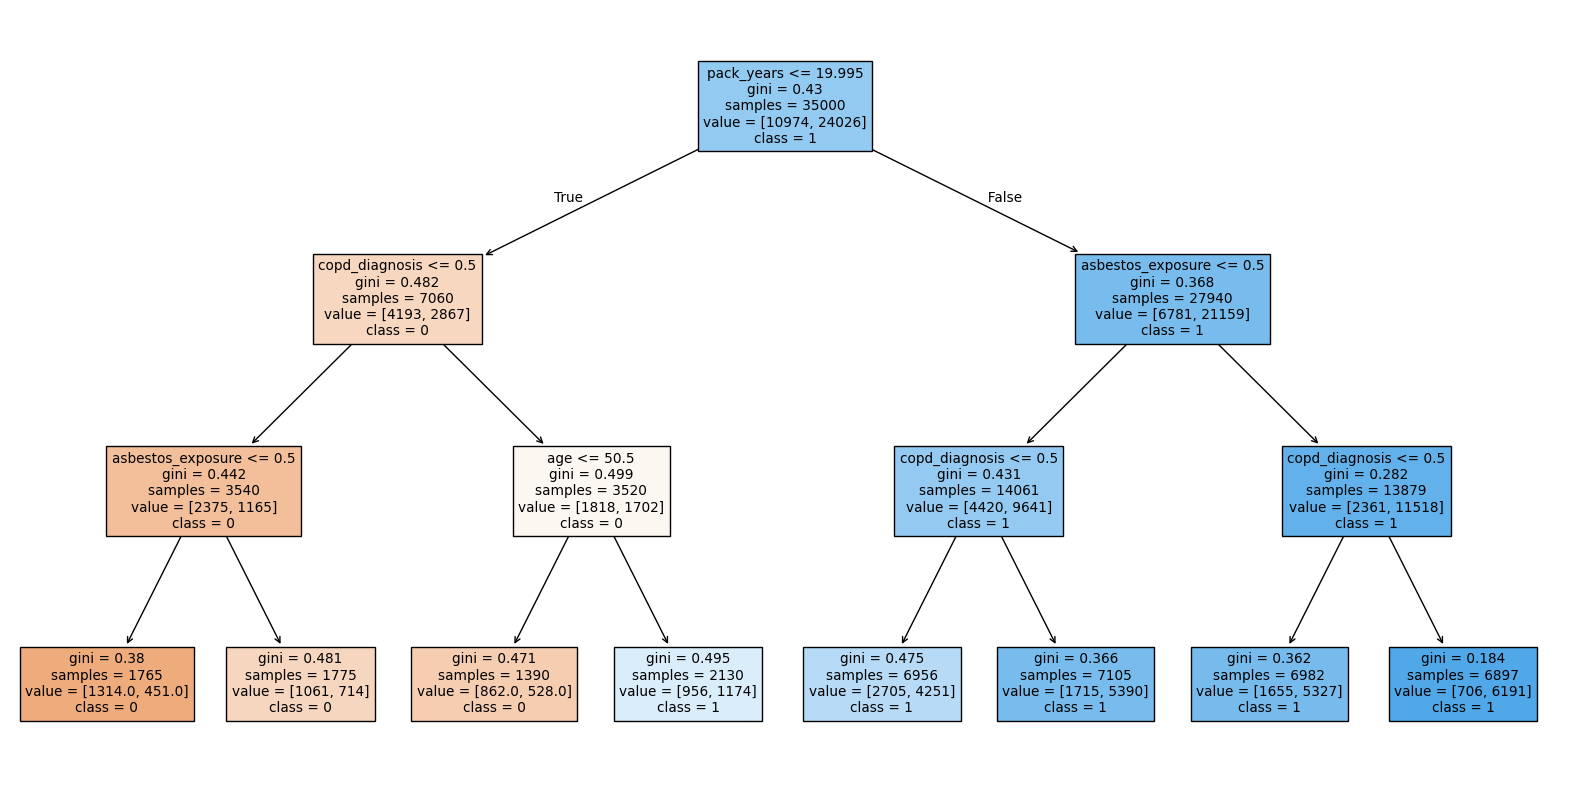

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score
from sklearn import tree
import matplotlib.pyplot as plt
X = df.drop("lung_cancer", axis=1)
y = df["lung_cancer"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
DecisionTreeClassifier(criterion="entropy")

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("if entropy")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,feature_names=X.columns,class_names=["0","1"])
plt.show()




In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score

clf = RandomForestClassifier(random_state=42,max_depth=12,n_estimators=100,oob_score=True)
clf.fit(X_train, y_train)


y_preddt = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_preddt)
recall = recall_score(y_test, y_preddt)
precision=precision_score(y_test,y_preddt)
conf_matrix = confusion_matrix(y_test, y_preddt)


print("Accuracy: ",accuracy)
print("Recall: %.2f" % recall)
print("precision",precision)

Accuracy:  0.7307333333333333
Recall: 0.89
precision 0.7600528445215093


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
configs = [10, 50, 100, 200]

print("RandomForestRegressor with OOB Score ")
for n in configs:
    rf = RandomForestRegressor(
        n_estimators=n,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    print(f"n_estimators={n:3} | OOB Score: {rf.oob_score_:.4f} | Test R² Score: {test_r2:.4f}")

RandomForestRegressor with OOB Score 


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators= 10 | OOB Score: -0.1389 | Test R² Score: 0.0468
n_estimators= 50 | OOB Score: 0.0873 | Test R² Score: 0.1071
n_estimators=100 | OOB Score: 0.1085 | Test R² Score: 0.1120
n_estimators=200 | OOB Score: 0.1210 | Test R² Score: 0.1157


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define model
rf = RandomForestClassifier(random_state=42)

# Step 2: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # metric to optimize
    n_jobs=-1,          # use all CPU cores
    verbose=2,
    refit=True
)

# Step 4: Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Step 6: Predict with best estimator
y_pred = grid_search.best_estimator_.predict(X_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)



models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]
preds, probas, accs = [], [], []
for m in models:
    m.fit(x_train, y_train)
    p = m.predict(x_test)
    preds.append(p)
    probas.append(m.predict_proba(x_test))
    accs.append(accuracy_score(y_test, p))

# Max Voting
max_vote = np.array([np.bincount(row).argmax() for row in np.column_stack(preds)])

# Average Voting
avg_vote = np.argmax(np.mean(probas, axis=0), axis=1)

# Weighted Voting
weights = np.array(accs) / sum(accs)
weighted_proba = sum(w * p for w, p in zip(weights, probas))
weighted_vote = np.argmax(weighted_proba, axis=1)

# Evaluation function
def eval_model(name, y_pred):
    print(f"{name:<15} Acc={accuracy_score(y_test, y_pred):.3f}  Pre={precision_score(y_test, y_pred):.3f}  Rec={recall_score(y_test, y_pred):.3f}  F1={f1_score(y_test, y_pred):.3f}")

names = ["Logistic", "DecisionTree", "KNN", "MaxVoting", "AvgVoting", "WeightedVoting"]
for n, p in zip(names, preds + [max_vote, avg_vote, weighted_vote]):
    eval_model(n, p)

Logistic        Acc=0.718  Pre=0.746  Rec=0.897  F1=0.814
DecisionTree    Acc=0.647  Pre=0.748  Rec=0.737  F1=0.742
KNN             Acc=0.690  Pre=0.746  Rec=0.833  F1=0.787
MaxVoting       Acc=0.709  Pre=0.748  Rec=0.872  F1=0.805
AvgVoting       Acc=0.682  Pre=0.750  Rec=0.809  F1=0.778
WeightedVoting  Acc=0.685  Pre=0.749  Rec=0.817  F1=0.781


In [17]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Hard Voting
hard_voting = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('knn', knn)], voting='hard')
hard_voting.fit(x_train, y_train)
y_pred_hard = hard_voting.predict(x_test)
hard_acc = accuracy_score(y_test, y_pred_hard)

# Soft Voting
soft_voting = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('knn', knn)], voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)
soft_acc = accuracy_score(y_test, y_pred_soft)

print("Hard Voting Accuracy:", hard_acc)
print("Soft Voting Accuracy:", soft_acc)

Hard Voting Accuracy: 0.7089333333333333
Soft Voting Accuracy: 0.6824666666666667


In [18]:
configs = [
    {"n_estimators": 10, "max_depth": None},
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 100, "max_depth": 3},
    {"n_estimators": 100, "max_depth": 5},
]

print("Random Forest Bagging Performance")
for cfg in configs:
    rf = RandomForestClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={cfg['n_estimators']}, max_depth={cfg['max_depth']} --> Accuracy: {acc:.4f}")



Random Forest Bagging Performance
n_estimators=10, max_depth=None --> Accuracy: 0.6879
n_estimators=50, max_depth=None --> Accuracy: 0.7088
n_estimators=100, max_depth=None --> Accuracy: 0.7109
n_estimators=100, max_depth=3 --> Accuracy: 0.7309
n_estimators=100, max_depth=5 --> Accuracy: 0.7334


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define estimators
estimators = [
    ('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200)),
    ('SVC', SVC(gamma='auto', probability=True)),
    ('DTC', DecisionTreeClassifier())
]

# Soft Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
# hard Voting Classifier
voting_clf1 = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train_scaled, y_train)
voting_clf1.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred = voting_clf.predict(X_test_scaled)
y_predh = voting_clf.predict(X_test_scaled)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred))



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print("Hard Voting Accuracy:", accuracy_score(y_test, y_predh))

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
n_estimators_list = [5, 10, 50, 100, 200]
max_depth_list = [2, 4, 6, 8, None]  # None = grow until all leaves are pure

train_acc = []
test_acc = []

for n in n_estimators_list:
    for d in max_depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)

        print(f"n_estimators={n}, max_depth={d}")
        print(f"Train Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}\n")


n_estimators=5, max_depth=2
Train Accuracy: 0.952, Test Accuracy: 1.000

n_estimators=5, max_depth=4
Train Accuracy: 0.990, Test Accuracy: 1.000

n_estimators=5, max_depth=6
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=5, max_depth=8
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=5, max_depth=None
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=10, max_depth=2
Train Accuracy: 0.943, Test Accuracy: 1.000

n_estimators=10, max_depth=4
Train Accuracy: 0.971, Test Accuracy: 1.000

n_estimators=10, max_depth=6
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=10, max_depth=8
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=10, max_depth=None
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=50, max_depth=2
Train Accuracy: 0.933, Test Accuracy: 1.000

n_estimators=50, max_depth=4
Train Accuracy: 0.971, Test Accuracy: 1.000

n_estimators=50, max_depth=6
Train Accuracy: 1.000, Test Accuracy: 1.000

n_estimators=50, max_depth=8
Train Ac

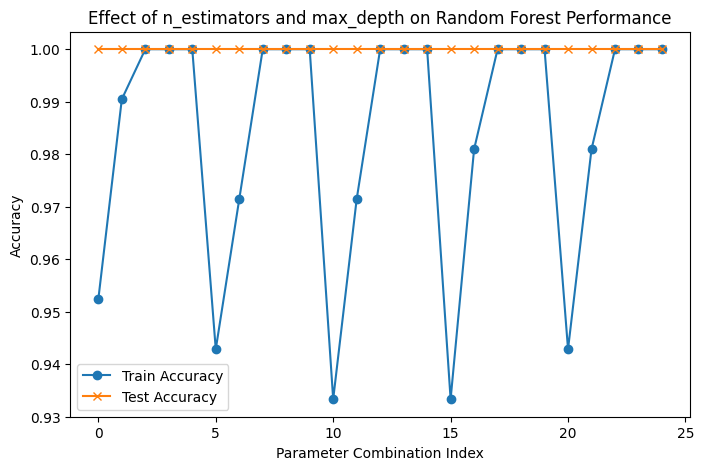

In [5]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_acc)), train_acc, label='Train Accuracy', marker='o')
plt.plot(range(len(test_acc)), test_acc, label='Test Accuracy', marker='x')
plt.title('Effect of n_estimators and max_depth on Random Forest Performance')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42)
}

results = []
for name, model in models.items():
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test) # Corrected from y_test to x_test

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append([name, train_acc, test_acc, round(end - start, 2)])

df_results = pd.DataFrame(results, columns=['Model', 'Train Acc', 'Test Acc', 'Train Time (s)'])
print(df_results)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:06:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              Model  Train Acc  Test Acc  Train Time (s)
0           Bagging   1.000000  0.704400           20.78
1      RandomForest   1.000000  0.710933            7.17
2          AdaBoost   0.740914  0.736867            3.77
3  GradientBoosting   0.744000  0.738800            6.79
4           XGBoost   0.816600  0.722400            0.50
5          CatBoost   0.764571  0.733267            1.33


In [20]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from matplotlib.colors import ListedColormap
features = ['age', 'pack_years'] # Changed features to existing columns
models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42)
}

def plot_decision_boundary(model, X, y, title, scaled=False, scaler=None):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaled and scaler:
        grid_scaled = scaler.transform(grid)
        Z = model.predict(grid_scaled)
    else:
        Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']), edgecolor='k')
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:11:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/

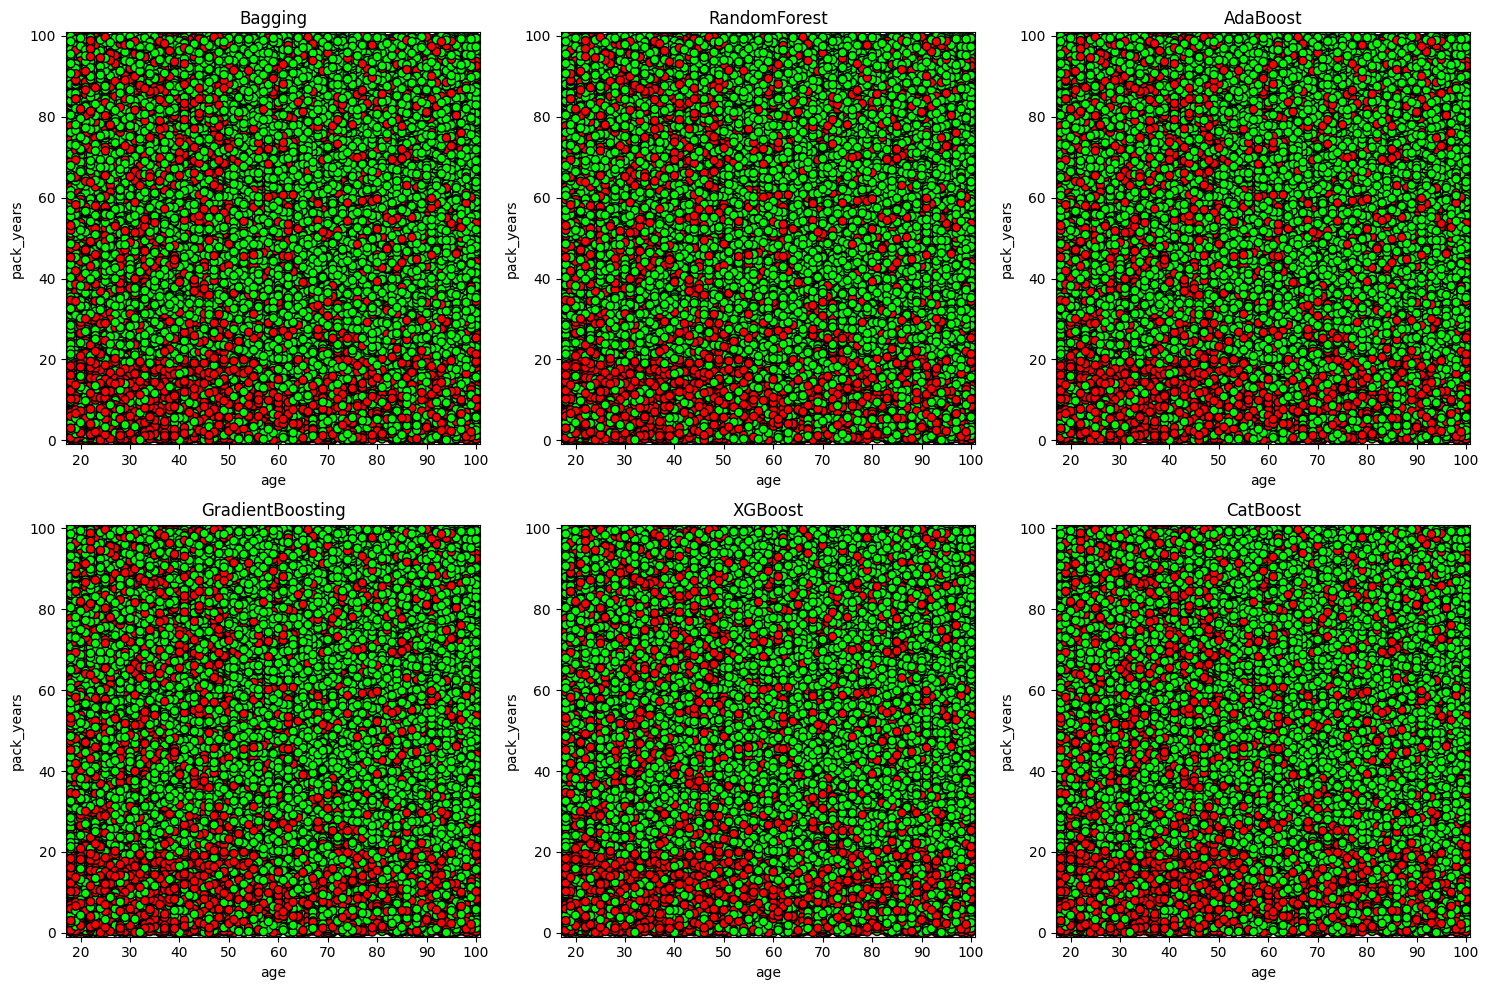

In [27]:
plt.figure(figsize=(15, 10))

# Select features for plotting
X_plot = X[features].copy()

# Fill NaN values in the selected features
X_plot.fillna(X_plot.mean(), inplace=True)

# Create a new scaler instance for the two features
scaler_subset = StandardScaler()
X_scaled_subset = scaler_subset.fit_transform(X_plot)

# Split the scaled subset data for training and testing
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_scaled_subset, y, test_size=0.3, random_state=1
)

for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 3, i+1)
    # Select only the two features for training the model for plotting
    model.fit(X_train_subset, y_train_subset)
    plot_decision_boundary(model, X_plot, y, name, scaled=True, scaler=scaler_subset)


plt.tight_layout()
plt.show()

In [28]:
# Add noise to test data
X_test_noisy = x_test.copy()
X_test_noisy += np.random.normal(0, 10, X_test_noisy.shape)  # Noise with std dev = 10

X_test_noisy_scaled = scaler.transform(X_test_noisy)

print("\n--- Performance with NOISY DATA ---\n")
for name, model in models.items():
    # Re-fit the model on the full training data before evaluating on noisy data
    model.fit(x_train, y_train)
    if name in ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"]:
        y_pred_noisy = model.predict(X_test_noisy_scaled)
    else:
        y_pred_noisy = model.predict(X_test_noisy)
    acc_noisy = accuracy_score(y_test, y_pred_noisy)
    print(f"{name}: Accuracy with noise = {acc_noisy:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



--- Performance with NOISY DATA ---

Bagging: Accuracy with noise = 0.523
RandomForest: Accuracy with noise = 0.547
AdaBoost: Accuracy with noise = 0.382
GradientBoosting: Accuracy with noise = 0.340


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:14:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy with noise = 0.327
CatBoost: Accuracy with noise = 0.354


In [29]:
# Introduce 10% missing values in test set
X_test_missing = pd.DataFrame(x_test.copy()) # Convert to DataFrame
mask = np.random.rand(*X_test_missing.shape) < 0.1
X_test_missing[mask] = np.nan

# Simple imputation: fill missing values with mean
X_test_imputed = X_test_missing.fillna(X_test_missing.mean()) # Use X_test_missing.mean()
X_test_imputed_scaled = scaler.transform(X_test_imputed)


print("\nPerformance with MISSING DATA (after imputation) \n")
for name, model in models.items():
    if name in ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"]:
        y_pred_imp = model.predict(X_test_imputed_scaled)
    else:
        y_pred_imp = model.predict(X_test_imputed)
    acc_imp = accuracy_score(y_test, y_pred_imp)
    print(f"{name}: Accuracy with missing (imputed) = {acc_imp:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Performance with MISSING DATA (after imputation) 

Bagging: Accuracy with missing (imputed) = 0.699
RandomForest: Accuracy with missing (imputed) = 0.706
AdaBoost: Accuracy with missing (imputed) = 0.432
GradientBoosting: Accuracy with missing (imputed) = 0.366
XGBoost: Accuracy with missing (imputed) = 0.311
CatBoost: Accuracy with missing (imputed) = 0.341


In [31]:
# Reload full dataset (all 8 features)
X_full = df.drop('lung_cancer', axis=1)
y_full = df['lung_cancer']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

# Train each model and extract feature importance
importances = {}

for name, model in models.items():
    if name in ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"]:
        model.fit(X_train_full_scaled, y_train_full)
    else:
        model.fit(X_train_full, y_train_full)

    if hasattr(model, 'feature_importances_'):
        importances[name] = model.feature_importances_
    else:
        importances[name] = np.zeros(X_full.shape[1])

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:16:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


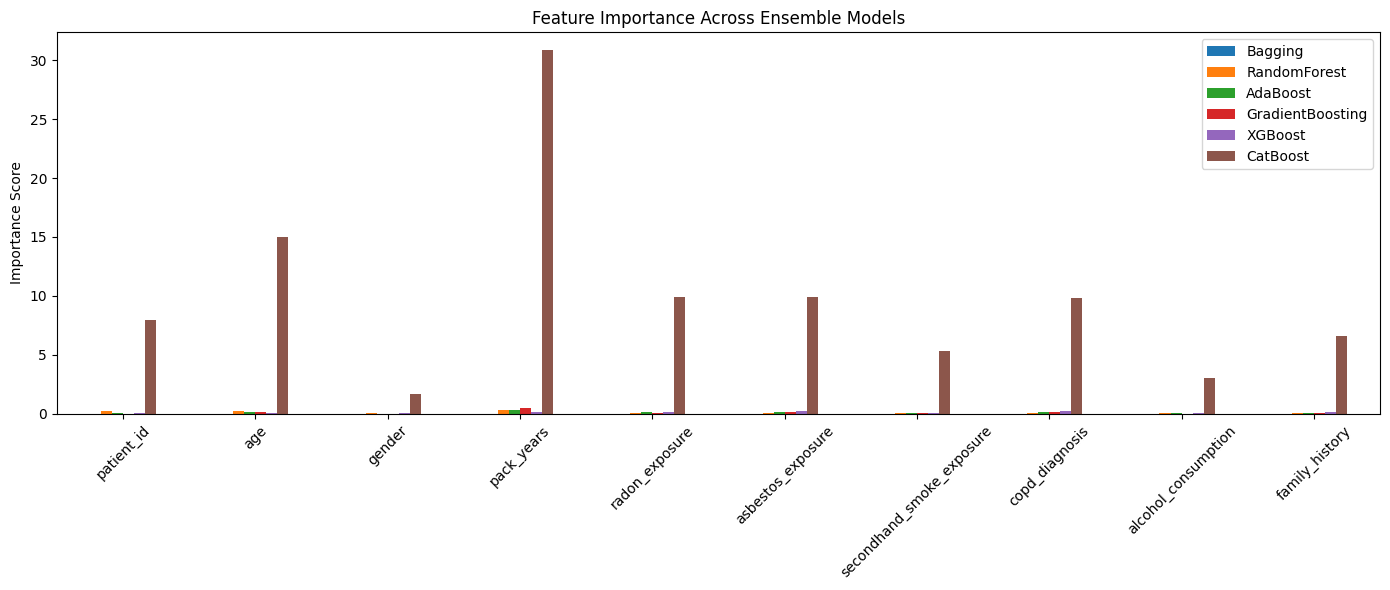

In [32]:
importance_df = pd.DataFrame(importances, index=X_full.columns)
importance_df.plot(kind='bar', figsize=(14, 6))
plt.title("Feature Importance Across Ensemble Models")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.svm import SVC


dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(random_state=42, max_iter=500)
svm = SVC(probability=True, random_state=42)



hetero_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard'
)

hetero_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)
hetero_hard.fit(x_train, y_train)
hetero_soft.fit(x_train, y_train)

y_pred_hard = hetero_hard.predict(x_test)
y_pred_soft = hetero_soft.predict(x_test)

acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print("Heterogeneous Ensemble (Hard Voting) Accuracy:", round(acc_hard, 3))
print("Heterogeneous Ensemble (Soft Voting) Accuracy:", round(acc_soft, 3))


Heterogeneous Ensemble (Hard Voting) Accuracy: 0.714
Heterogeneous Ensemble (Soft Voting) Accuracy: 0.707


In [34]:


bagging = BaggingClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "AdaBoost": adaboost,
    "Gradient Boosting": gb
}

print("\nHomogeneous Ensemble Accuracies ")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.3f}")



Homogeneous Ensemble Accuracies 
Bagging: 0.704
Random Forest: 0.711
AdaBoost: 0.737
Gradient Boosting: 0.739


In [35]:
results = pd.DataFrame({
    'Model': ['Hetero Hard', 'Hetero Soft', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [acc_hard, acc_soft] + [
        accuracy_score(y_test, m.predict(x_test)) for m in [bagging, rf, adaboost, gb]
    ]
})

print("\n Final Comparison Table:\n")
print(results.sort_values(by='Accuracy', ascending=False))


 Final Comparison Table:

               Model  Accuracy
5  Gradient Boosting  0.738800
4           AdaBoost  0.736867
0        Hetero Hard  0.713733
3      Random Forest  0.710933
1        Hetero Soft  0.707200
2            Bagging  0.704400


In [36]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score

# Homogeneous Ensembles
models = [
    ('Bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)),
    ('RandomForest', RandomForestClassifier(n_estimators=100))
]

# Heterogeneous Ensembles
base = [
    ('lr', LogisticRegression(max_iter=500)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]
models += [
    ('Voting-Hard', VotingClassifier(estimators=base, voting='hard')),
    ('Voting-Soft', VotingClassifier(estimators=base, voting='soft')),
    ('Stacking', StackingClassifier(estimators=base[:-1], final_estimator=SVC(probability=True)))
]

results = []
for name, model in models:
    start = time.time()
    model.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    results.append([name, acc, time.time() - start])

df = pd.DataFrame(results, columns=['Model','Accuracy','Train Time (s)']).sort_values(by='Accuracy', ascending=False)
print(df)

          Model  Accuracy  Train Time (s)
4      Stacking  0.719267      302.433049
2   Voting-Hard  0.714533      334.084719
1  RandomForest  0.714067        8.288041
3   Voting-Soft  0.707867      332.373738
0       Bagging  0.702133       10.554626
